In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

## Sentiment Analysis

We are going to be using TextBlob to analyze the sentiment of Airbnb reviews that are comprised of text, just like a typical review that an Airbnb guest might leave on the Airbnb website. Now, let's understand how TextBlob works. TextBlob returns a sentiment score. The sentiment score falls within the range [-1, 1] where a score of -1 describes a completely negative sentiment, a score of 1 describes a completely positive sentiment, and a score of 0 describes a completely nuetral sentiment. I have listed 4 basic examples below of sentences with different sentiment.

In [2]:
#examples of how TextBlob determines text sentiment
#awesome, sentiment score = 1
statement = "I went to Burger King and the food was awesome"
sentiment = TextBlob(statement)
print("Statement: ", statement)
print("Sentiment Score: ", sentiment.polarity)

Statement:  I went to Burger King and the food was awesome
Sentiment Score:  1.0


In [3]:
#very good, sentiment score = .91
statement2 = "I went to Burger King and the food was very good"
sentiment2 = TextBlob(statement2)
print("Statement: ", statement2)
print("Sentiment Score: ", sentiment2.polarity)

Statement:  I went to Burger King and the food was very good
Sentiment Score:  0.9099999999999999


In [4]:
#not good, sentiment score = -.35
statement3 = "I went to Burger King and the food was not good"
sentiment3 = TextBlob(statement3)
print("Statement: ", statement3)
print("Sentiment Score: ", sentiment3.polarity)

Statement:  I went to Burger King and the food was not good
Sentiment Score:  -0.35


In [5]:
#awful, sentiment score = -1
statement4 = "I went to Burger King and the food was awful"
sentiment4 = TextBlob(statement4)
print("Statement: ", statement4)
print("Sentiment Score: ", sentiment4.polarity)

Statement:  I went to Burger King and the food was awful
Sentiment Score:  -1.0


Now that we understand how TextBlob analyzes sentiment, let's take a look at our Airbnb data.

In [6]:
#read in and look at data
airbnb = pd.read_csv("NYC_2021_airbnb_reviews_data1.csv")
airbnb.head()

,listing_id,url,review_posted_date,review
0,2595,https://www.airbnb.com/rooms/2595,November 2019,"Great location, convenient to everything. Very..."
1,2595,https://www.airbnb.com/rooms/2595,May 2019,Place was so cute and comfy! Host was great an...
2,2595,https://www.airbnb.com/rooms/2595,May 2019,10 / 10 would stay again
3,2595,https://www.airbnb.com/rooms/2595,January 2019,The apartment met expectations to how it was i...
4,2595,https://www.airbnb.com/rooms/2595,December 2018,Great space in a fun old building in NYC. Love...


## EDA (exploratory data analysis)

In [7]:
#check for NA's and data types
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17444 entries, 0 to 17443
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   listing_id          17444 non-null  int64 
 1   url                 17444 non-null  object
 2   review_posted_date  17444 non-null  object
 3   review              17444 non-null  object
dtypes: int64(1), object(3)
memory usage: 545.2+ KB


In [8]:
#check shape of dataframe
airbnb.shape

(17444, 4)

In [9]:
#describe numerical features
airbnb.describe()

,listing_id
count,1.744400e+04
mean,3.023876e+05
std,4.549987e+05
min,2.595000e+03
25%,1.682100e+04
50%,1.411540e+05
75%,2.326120e+05
max,1.918693e+06


##### number of different listings

In [10]:
#how many unique airbnb listings
len(airbnb['listing_id'].unique())

219

##### total number of reviews

In [11]:
#find number of entries in dataframe
len(airbnb)

17444

Now we want to get sentiment scores for all the reviews in this dataset.

In [12]:
#loop through dataset and get sentiment and subjectivity scores
score = []
for i in range(0,len(airbnb)):
    statement = airbnb['review'][i]
    sentiment = TextBlob(statement)
    score.append(sentiment.sentiment.polarity)
score

[0.6275,
 0.4552083333333333,
 0.0,
 0.08437499999999999,
 0.47500000000000003,
 0.3464285714285714,
 0.4470833333333334,
 0.2112121212121212,
 0.1875,
 0.24106060606060603,
 0.290625,
 0.14,
 0.3958333333333333,
 0.6334821428571429,
 0.3181089743589744,
 0.39580519480519477,
 0.425,
 0.4338194444444445,
 0.40367647058823525,
 0.4333333333333334,
 0.5011111111111112,
 0.3078737373737374,
 0.7733333333333334,
 0.4125,
 0.375,
 0.8,
 0.018883116883116894,
 0.36698717948717946,
 0.38928571428571435,
 0.855,
 0.5,
 0.292,
 0.3333333333333333,
 0.07401515151515152,
 0.3584615384615385,
 0.3427777777777778,
 0.25555555555555554,
 0.33666666666666667,
 0.16448412698412693,
 0.28125,
 0.3096205357142857,
 0.51875,
 0.26687500000000003,
 0.4101239669421488,
 0.0,
 0.0,
 0.0,
 0.0,
 0.309375,
 0.37916666666666665,
 0.7500000000000001,
 0.39515151515151514,
 0.22653846153846155,
 0.47348484848484856,
 0.47777777777777775,
 0.558125,
 0.05555555555555557,
 0.1875,
 0.32569444444444445,
 0.33023088

In [13]:
#add sentiment scores to dataframe
airbnb['sentiment_score'] = score
#round sentiment and subjectivity scores
airbnb['sentiment_score'] = round(airbnb['sentiment_score'],2)

In [14]:
#create 'review_count' variable to record how many reviews were submitted for that specific listing_id
airbnb['review_count'] = airbnb.groupby('listing_id')['listing_id'].transform('count') 
airbnb.head()

,listing_id,url,review_posted_date,review,sentiment_score,review_count
0,2595,https://www.airbnb.com/rooms/2595,November 2019,"Great location, convenient to everything. Very...",0.63,48
1,2595,https://www.airbnb.com/rooms/2595,May 2019,Place was so cute and comfy! Host was great an...,0.46,48
2,2595,https://www.airbnb.com/rooms/2595,May 2019,10 / 10 would stay again,0.00,48
3,2595,https://www.airbnb.com/rooms/2595,January 2019,The apartment met expectations to how it was i...,0.08,48
4,2595,https://www.airbnb.com/rooms/2595,December 2018,Great space in a fun old building in NYC. Love...,0.48,48


Now let's take a look at the first few entries and see what TextBlob returned.

In [15]:
#1st entry
print("Review: ", airbnb['review'][0])
print("Sentiment Score: ", airbnb['sentiment_score'][0])

Review:  Great location, convenient to everything. Very cool space and building.
Sentiment Score:  0.63


This first review clearly is giving off a positive sentiment. TextBlob correctly classifies it as such. There is no negative sentiment so we might think that the sentiment score should be 1. But as I showed in the basic examples earlier, to acheive a sentiment score of 1, you need to use words like 'awesome' or 'fantastic'. This review used words like 'great', 'convenient', and 'very cool', which is why the sentiment is positive, but not as positive as it could be.

In [16]:
#2nd entry
print("Review: ", airbnb['review'][1])
print("Sentiment Score: ", airbnb['sentiment_score'][1])

Review:  Place was so cute and comfy! Host was great and was quick to communicate when I had questions. Quick walk to the subway and only about 5 min walk to the Empire State Building. Overall great stay and host was amazing!
Sentiment Score:  0.46


This seems like a completely positive review that doesn't contain a single negative sentiment. However, words like 'questions' and 'only' can have a negative sentiment in a different context. Overall, TextBlob correctly classifies this statement as having a positive sentiment, but maybe not as positive as it should be.

In [17]:
#3rd entry
print("Review: ", airbnb['review'][2])
print("Sentiment Score: ", airbnb['sentiment_score'][2])

Review:  10 / 10 would stay again
Sentiment Score:  0.0


This is obviously a very positive review, TextBlob doesn't understand that '10/10' is a completely positive sentiment. This is a negative of working with an out-of-the-box sentiment analyzer. Not every text statement will contain a key word that TextBlob can use to classify sentiment as either positive or negative. We will see issues like this, but most statements can be classified.

Now let's take a look at the distribution of sentiment scores.

In [18]:
#describe data
airbnb.describe()

,listing_id,sentiment_score,review_count
count,1.744400e+04,17444.000000,17444.000000
mean,3.023876e+05,0.387924,200.292937
std,4.549987e+05,0.212449,147.628087
min,2.595000e+03,-1.000000,1.000000
25%,1.682100e+04,0.270000,87.000000
50%,1.411540e+05,0.380000,165.000000
75%,2.326120e+05,0.500000,258.000000
max,1.918693e+06,1.000000,630.000000


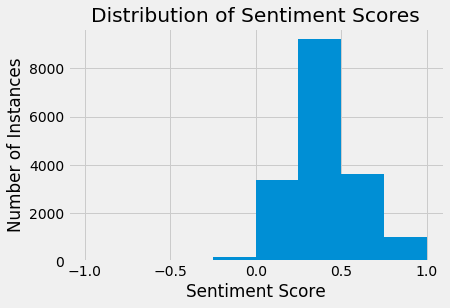

In [19]:
#distribution of sentiment scores
plt.style.use('fivethirtyeight')#changes plot style for future plots
plt.hist(airbnb['sentiment_score'], bins=8)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Instances')
plt.show()

Here we can see that the Sentiment Scores distribution skews postive and has an average value of 0.39. Below we can see the total number of negative, neutral, and positive reviews.

##### number of negative reviews

In [20]:
len(airbnb[airbnb['sentiment_score'] < 0])

204

##### number of neutral reviews

In [21]:
len(airbnb[airbnb['sentiment_score'] == 0])

1065

##### number of positive reviews

In [22]:
len(airbnb[airbnb['sentiment_score'] > 0])

16175

Let's look at which properties have the best (and worst) Average Sentiment Scores.

In [23]:
#group df by listing_id, get avg scores of each listing_id
#grouping only includes numerical variables
avg_scores = airbnb.groupby(['listing_id']).mean()
avg_scores

,sentiment_score,review_count
listing_id,,
2595,0.337500,48
5121,0.423600,50
5178,0.394416,231
5203,0.424407,118
5803,0.411019,206
...,...,...
1910270,0.585714,7
1913540,0.200000,2
1914185,0.378636,22


In [24]:
#reset index
avg_scores.reset_index(inplace=True)

In [25]:
#show re-indexed dataframe
print(avg_scores)

     listing_id  sentiment_score  review_count
0          2595         0.337500            48
1          5121         0.423600            50
2          5178         0.394416           231
3          5203         0.424407           118
4          5803         0.411019           206
..          ...              ...           ...
214     1910270         0.585714             7
215     1913540         0.200000             2
216     1914185         0.378636            22
217     1914231         0.373929            28
218     1918693         0.468571             7

[219 rows x 3 columns]


In [26]:
#Top 5 Locations based on Avg. Sentiment Score
avg_scores.sort_values(by='sentiment_score', ascending=False)[['listing_id', 'sentiment_score', 'review_count']].head()

,listing_id,sentiment_score,review_count
172,862890,0.675000,4
214,1910270,0.585714,7
187,1215836,0.560000,1
150,788005,0.547368,19
145,245574,0.545714,7


In [27]:
#Bottom 5 Locations based on Avg. Sentiment Score
avg_scores.sort_values(by='sentiment_score', ascending=True)[['listing_id', 'sentiment_score', 'review_count']].head()

,listing_id,sentiment_score,review_count
193,1252826,0.000000,1
107,214917,0.025000,2
200,1869685,0.036667,9
159,794535,0.096667,3
195,1256670,0.100000,3


Let's review examples from top and bottom 5 lists.

In [28]:
#reviews from top rated location
airbnb[airbnb['listing_id'] == 862890]

,listing_id,url,review_posted_date,review,sentiment_score,review_count
15301,862890,https://www.airbnb.com/rooms/862890,October 2020,"Great space, location and host!",1.00,4
15302,862890,https://www.airbnb.com/rooms/862890,May 2019,I had an amazing stay with Rachel & I would do...,0.78,4
15303,862890,https://www.airbnb.com/rooms/862890,November 2017,I highly recommend the AirBnB from Rachel…You ...,0.25,4
15304,862890,https://www.airbnb.com/rooms/862890,October 2017,"Kaya is fabulous - very kind, welcoming and ea...",0.67,4


There are only 4 reviews from the top rated location based on Average Sentiment Score. So we have a small sample size, and it also has a review with a sentiment score of 1, which is greatly impacting the Average Sentiment Score.

To determine which locations are the highest (and lowest) rated, we want locations with a legitimate sample size, so that the Average Sentiment Score isn't skewed by one really good or really bad review. So let's only consider locations with at least 10 reviews for the highest and lowest rated locations.

In [29]:
#filter out locations with less than 10 reviews
airbnb2 = airbnb[airbnb['review_count'] > 9]
airbnb2.head()

,listing_id,url,review_posted_date,review,sentiment_score,review_count
0,2595,https://www.airbnb.com/rooms/2595,November 2019,"Great location, convenient to everything. Very...",0.63,48
1,2595,https://www.airbnb.com/rooms/2595,May 2019,Place was so cute and comfy! Host was great an...,0.46,48
2,2595,https://www.airbnb.com/rooms/2595,May 2019,10 / 10 would stay again,0.00,48
3,2595,https://www.airbnb.com/rooms/2595,January 2019,The apartment met expectations to how it was i...,0.08,48
4,2595,https://www.airbnb.com/rooms/2595,December 2018,Great space in a fun old building in NYC. Love...,0.48,48


In [30]:
#check how many reviews are in new dataframe
len(airbnb2['listing_id'].unique())

173

In [31]:
#group df by listing_id, get avg scores of each listing_id
avg_scores2 = airbnb2.groupby(['listing_id']).mean()
avg_scores2

,sentiment_score,review_count
listing_id,,
2595,0.337500,48
5121,0.423600,50
5178,0.394416,231
5203,0.424407,118
5803,0.411019,206
...,...,...
1893225,0.384583,24
1897447,0.385714,14
1901357,0.427619,21


In [32]:
#reset index
avg_scores2.reset_index(inplace=True)

In [33]:
#print re-indexed dataframe
print(avg_scores2)

     listing_id  sentiment_score  review_count
0          2595         0.337500            48
1          5121         0.423600            50
2          5178         0.394416           231
3          5203         0.424407           118
4          5803         0.411019           206
..          ...              ...           ...
168     1893225         0.384583            24
169     1897447         0.385714            14
170     1901357         0.427619            21
171     1914185         0.378636            22
172     1914231         0.373929            28

[173 rows x 3 columns]


### Top 5 Locations

In [34]:
#Top 5 Locations based on Avg. Sentiment Score
top5 = avg_scores2.sort_values(by='sentiment_score', ascending=False)[['listing_id', 'sentiment_score', 'review_count']].head()
top5

,listing_id,sentiment_score,review_count
132,788005,0.547368,19
166,1887600,0.510000,15
105,225354,0.482727,11
47,106363,0.480000,35
147,803778,0.458571,14


### Bottom 5 Locations

In [35]:
#Bottom 5 Locations based on Avg. Sentiment Score
bot5 = avg_scores2.sort_values(by='sentiment_score', ascending=True)[['listing_id', 'sentiment_score', 'review_count']].head()
bot5

,listing_id,sentiment_score,review_count
111,228925,0.265455,11
134,789476,0.273200,25
54,114123,0.273824,34
106,225976,0.277614,88
136,794281,0.277826,23


In [36]:
#export csv
#top5.to_csv('top5_sent_scores.csv', index=False)

In [37]:
#export csv
#bot5.to_csv('bot5_sent_scores.csv', index=False)

Lets look at the reviews from the top rated location.

In [38]:
#reviews from highest rated location (listing_id=788005)
loc = airbnb2[airbnb2['listing_id'] == 788005]
loc

,listing_id,url,review_posted_date,review,sentiment_score,review_count
14722,788005,https://www.airbnb.com/rooms/788005,January 2022,The place was great! Super clean and nice,0.57,19
14723,788005,https://www.airbnb.com/rooms/788005,August 2021,This is a lovely and well appointed apartment ...,0.54,19
14724,788005,https://www.airbnb.com/rooms/788005,July 2021,"Beautiful apartment in a great location, perfe...",0.88,19
14725,788005,https://www.airbnb.com/rooms/788005,October 2020,Rita's appartment is gorgeous and is located i...,0.42,19
14726,788005,https://www.airbnb.com/rooms/788005,January 2020,Rita's place is so stylish and comfortable. Sh...,0.48,19
14727,788005,https://www.airbnb.com/rooms/788005,November 2019,This Airbnb was amazing! Perfect location and ...,0.58,19
14728,788005,https://www.airbnb.com/rooms/788005,November 2019,Enjoyed staying here. It was super quiet and v...,0.46,19
14729,788005,https://www.airbnb.com/rooms/788005,August 2019,The apartment is gorgeous and ideally situated...,0.56,19
14730,788005,https://www.airbnb.com/rooms/788005,March 2019,My husband and I very much enjoyed our stay wi...,0.62,19
14731,788005,https://www.airbnb.com/rooms/788005,March 2018,"Beautiful apartment, pictures don't do it just...",0.61,19


In [39]:
#describe scores for listing_id=788005
loc.describe()

,listing_id,sentiment_score,review_count
count,19.0,19.000000,19.0
mean,788005.0,0.547368,19.0
std,0.0,0.143714,0.0
min,788005.0,0.320000,19.0
25%,788005.0,0.465000,19.0
50%,788005.0,0.550000,19.0
75%,788005.0,0.615000,19.0
max,788005.0,0.880000,19.0


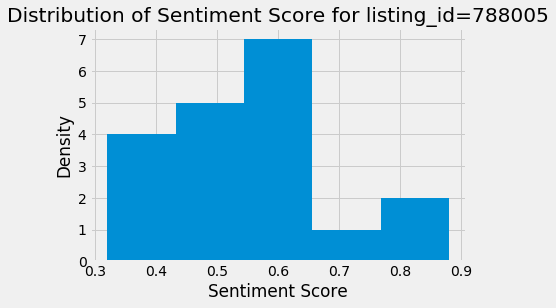

In [40]:
#distribution of sentiment scores for listing_id=788005
plt.hist(loc['sentiment_score'], bins=5)
plt.title('Distribution of Sentiment Score for listing_id=788005')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

Based on this summary of the top rated location based on Average Sentiment Score, we can see that all of the 19 reviews for this location have a positive sentiment score. There are no perfect ratings of 1 that are skewing the results and we have a much better sample size after we filtered out all the listing_ids with less than 10 reviews.

Now let's look at the worst rated location.

In [41]:
#reviews from bottom rated location
loc = airbnb2[airbnb2['listing_id'] == 228925]
loc

,listing_id,url,review_posted_date,review,sentiment_score,review_count
12844,228925,https://www.airbnb.com/rooms/228925,December 2017,Marceline was very accommodating during my sta...,0.13,11
12845,228925,https://www.airbnb.com/rooms/228925,April 2017,"Zachery, I am glad that you where satisfied wi...",0.60,11
12846,228925,https://www.airbnb.com/rooms/228925,October 2016,The host canceled this reservation 19 days bef...,0.00,11
12847,228925,https://www.airbnb.com/rooms/228925,July 2021,Marceline was a great host - super accommodati...,0.19,11
12848,228925,https://www.airbnb.com/rooms/228925,June 2019,Marceline is very accommodating and is very we...,0.32,11
12849,228925,https://www.airbnb.com/rooms/228925,April 2019,"Marceline was the perfect host, making us welc...",0.49,11
12850,228925,https://www.airbnb.com/rooms/228925,January 2018,This apartement is located in the heart of Bro...,0.22,11
12851,228925,https://www.airbnb.com/rooms/228925,July 2017,We really enjoyed our stay at Marceline's deli...,0.52,11
12852,228925,https://www.airbnb.com/rooms/228925,April 2017,"Hello Dianne, It was my pleasure hosting you a...",0.45,11
12853,228925,https://www.airbnb.com/rooms/228925,June 2017,The host canceled this reservation 64 days bef...,0.00,11


In [42]:
#describe scores for listing_id=228925
loc.describe()

,listing_id,sentiment_score,review_count
count,11.0,11.000000,11.0
mean,228925.0,0.265455,11.0
std,0.0,0.223981,0.0
min,228925.0,0.000000,11.0
25%,228925.0,0.065000,11.0
50%,228925.0,0.220000,11.0
75%,228925.0,0.470000,11.0
max,228925.0,0.600000,11.0


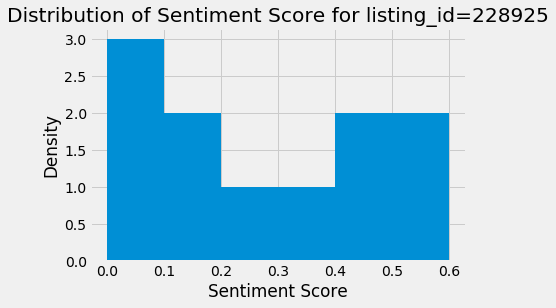

In [43]:
#distribution of sentiment scores for listing_id=228925
plt.hist(loc['sentiment_score'], bins=6)
plt.title('Distribution of Sentiment Score for listing_id=228925')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

Based on the summary of the lowest rated location based on Average Sentiment Score, The most populated bin in the distribution histogram is 0.0. A quick look at the reviews for this location (cell 41 output) tells us that in all three reviews with a 0.0 sentiment_score, the host cancelled the reservation. Let's take a look at one.

In [44]:
#review from lowest rated location
print("Review: ", loc['review'][12854])
print("Sentiment Score: ", loc['sentiment_score'][12854])

Review:  The host canceled this reservation 11 days before arrival. This is an automated posting.
Sentiment Score:  0.0


The idea that the host canceled a reservation seems negative from the perspective of the reviewer, but this review is actually an objective statement of fact. There is no sentiment in either direction in this review, which explains it's sentiment and subjectivity scores of 0.0.

Now that we have the best and worst rated locations based on Average Sentiment Scores, let's look at the distribution of Average Sentiment Scores for locations with 10 or more reviews.

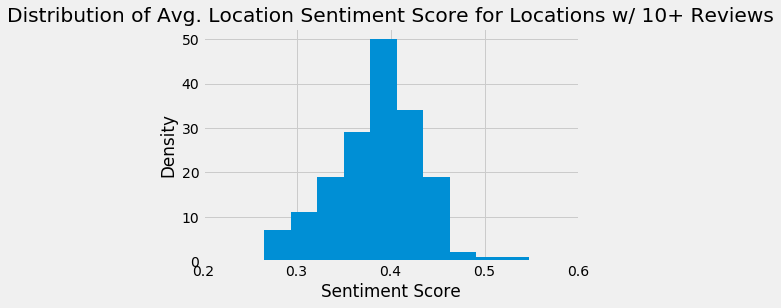

In [45]:
#distribution of sentiment scores for locations with 10+ reviews
plt.hist(avg_scores2['sentiment_score'], bins=10)
plt.title('Distribution of Avg. Location Sentiment Score for Locations w/ 10+ Reviews')
plt.xlabel('Sentiment Score')
plt.xticks([0.2,0.3,0.4,0.5,0.6])
plt.ylabel('Density')
#plt.annotate()
plt.show()

In [46]:
#description
avg_scores2.describe()

,listing_id,sentiment_score,review_count
count,1.730000e+02,173.000000,173.000000
mean,3.947742e+05,0.386513,99.387283
std,5.236711e+05,0.047302,101.825348
min,2.595000e+03,0.265455,10.000000
25%,1.003680e+05,0.355978,28.000000
50%,2.058670e+05,0.391250,59.000000
75%,2.455440e+05,0.418667,148.000000
max,1.914231e+06,0.547368,630.000000


Distribution of Average Sentiment Scores for locations with 10 or more reviews is approximately normal centered around a mean of 0.39.

Let's look at the distribution of review counts.

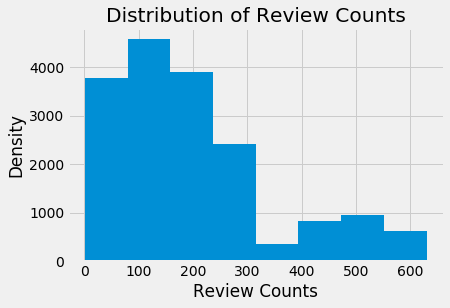

In [47]:
#distribution of review counts
plt.hist(airbnb['review_count'], bins=8)
plt.title('Distribution of Review Counts')
plt.xlabel('Review Counts')
#plt.xticks([0.2,0.3,0.4,0.5,0.6])
plt.ylabel('Density')
plt.show()

Let's look at a plot of Review Count vs. Average Sentiment Scores where each point represents a specific location from this data.

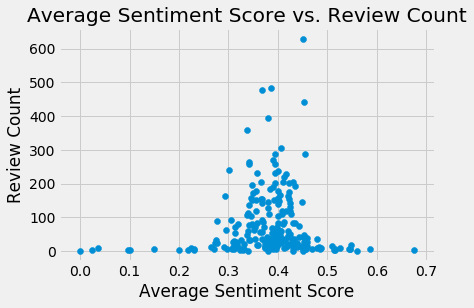

In [48]:
#plot average sentiment score vs. review count
plt.scatter(avg_scores['sentiment_score'], avg_scores['review_count'])
plt.title('Average Sentiment Score vs. Review Count')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Review Count')
plt.show()

This plot of Average Sentiment Score vs. Review Count shows us why we filtered out locations with less than 10 reviews. Locations with a small number of reviews tend to have outlier averages because of the small sample size. The locations with the largest number of reviews tend to converge at an Average Sentiment Score of approximately 0.4.

In [49]:
#number of characters for sent_score=1 vs. other positive sent_scores
#plot str length vs. sentiment score

Now let's analyze the sentiment analyzer. I am going to look to see if there is a relationship between sentiment score and length of review. So I am going to count the number of characters contained in each review, and compare it against the sentiment score for each review.

In [50]:
#get the number of characters for each review
airbnb['review'].str.len()

0         71
1        216
2         24
3        295
4        100
        ... 
17439    178
17440    234
17441    442
17442    102
17443    361
Name: review, Length: 17444, dtype: int64

In [51]:
#add number of characters into dataframe
airbnb['review_str_len'] = airbnb['review'].str.len()
airbnb.head()

,listing_id,url,review_posted_date,review,sentiment_score,review_count,review_str_len
0,2595,https://www.airbnb.com/rooms/2595,November 2019,"Great location, convenient to everything. Very...",0.63,48,71
1,2595,https://www.airbnb.com/rooms/2595,May 2019,Place was so cute and comfy! Host was great an...,0.46,48,216
2,2595,https://www.airbnb.com/rooms/2595,May 2019,10 / 10 would stay again,0.00,48,24
3,2595,https://www.airbnb.com/rooms/2595,January 2019,The apartment met expectations to how it was i...,0.08,48,295
4,2595,https://www.airbnb.com/rooms/2595,December 2018,Great space in a fun old building in NYC. Love...,0.48,48,100


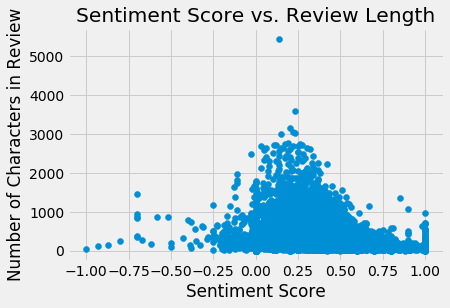

In [52]:
#plot sentiment score vs. review count
plt.scatter(airbnb['sentiment_score'], airbnb['review_str_len'])
plt.title('Sentiment Score vs. Review Length')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Characters in Review')
plt.xticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
plt.show()

Here we can see that there does appear to be a relationship between number of characters and sentiment score. The more characters contained within a review, the sentiment score tends to converge at approximately 0.25.

Now let's create a wordcloud from the reviews in this dataset. A wordcloud tells us the most frequently occuring words contained within all of the reviews in this data. This could be useful for a quick visual assessment of the general sentiment of all the reviews in this data.

In [53]:
#loop through reviews to remove commas
#this allows me to save df to a csv file, then upload into tableau
#commas in reviews were messing csv file when I uploaded it into tableau
for i in range(0, len(airbnb)):
    airbnb['review'][i] = airbnb['review'][i].replace(",", "")
    airbnb['review'][i] = airbnb['review'][i].replace("\n"," ")
airbnb.head()

C:\Users\clee4\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\clee4\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,listing_id,url,review_posted_date,review,sentiment_score,review_count,review_str_len
0,2595,https://www.airbnb.com/rooms/2595,November 2019,Great location convenient to everything. Very ...,0.63,48,71
1,2595,https://www.airbnb.com/rooms/2595,May 2019,Place was so cute and comfy! Host was great an...,0.46,48,216
2,2595,https://www.airbnb.com/rooms/2595,May 2019,10 / 10 would stay again,0.00,48,24
3,2595,https://www.airbnb.com/rooms/2595,January 2019,The apartment met expectations to how it was i...,0.08,48,295
4,2595,https://www.airbnb.com/rooms/2595,December 2018,Great space in a fun old building in NYC. Love...,0.48,48,100


In [54]:
#export csv
#airbnb.to_csv('airbnb.csv', index=False)

In [55]:
#export csv
#airbnb10 = airbnb[airbnb['review_count'] > 9]
#airbnb10.to_csv('airbnb_10.csv', index=False)

In [56]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

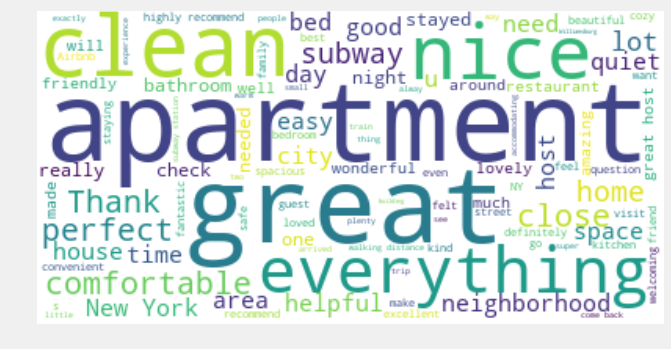

In [57]:
text = airbnb['review']
stopwords = set(STOPWORDS)
stopwords.update(["stay", "place", "room", "location", "stay", "New York", "NYC", "Brooklyn", "Manhattan"])
wc2 = WordCloud(max_words=100, stopwords=stopwords, background_color="white").generate(' '.join(text))
#generate plot
plt.figure(figsize=(10, 10))
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
fig1 = plt.gcf()
plt.show()
#save to png
#fig1.savefig('airbnb_wordcloud.png')

### Conclusion

An important note when considering insights is that we used TextBlob to analyze sentiment. And while we looked at a few individual examples of how TextBlob works in the beginning, we can't go through each review to see if it was correctly classified. So this sentiment analysis is completely dependent on the decisions made by TextBlob package. 

Another note is that we don't know the conditions in which this data was collected. We know that this is a dataset of Airbnb reviews that range from (2009-2022) in the NYC area. We don't know if this is the full collection of reviews, or a subset of the full collection of reviews. This is why I'm not using this data to make an inference about Airbnb as a whole. I'm only looking for the insights that can be gained from this specific set of data.

After looking at the distribution of sentiment scores for the entire set of reviews, combined with the wordcloud, we see that the general sentiment in these reviews is positive. We found that 16,175 of the 17,144 reviews (92.7%) were classified as positive, 6.2% of reviews were neutral, and only 1.1% of reviews were negative. We learned that distribution of Average Sentiment Scores among locations with 10 or more reviews is approximately normal centered at a mean of 0.39. We found the 5 best and worst rated locations based on Average Sentiment Score and looked at examples of each. And we discovered the relationships between sentiment scores and review count and length. Which are that as the number of reviews for a specific location goes up, the Average Sentiment Score for that location converges at approximately 0.4 (positive, but not overwhelmingly positive). And similarly, as the number of characters in a single review increases, the sentiment score for that review converges at approximately 0.25 (also positive, but not overwhelmingly positive).